In [2]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
from sklearn.svm import SVR
from sklearn.svm import SVC
import re
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from sklearn import ensemble
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score

sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Challenge #1 Boston Marathon

In [3]:

bm2013 = pd.read_csv('C://Users/ezzan/Downloads/2013.csv')

bm2013.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
#drop all non-variables
bm2013 = bm2013.drop(['name', 'bib', 'ctz', 'state', 'city', 'country', 'genderdiv'], axis = 1)
bm2013.head()

,25k,age,division,10k,gender,half,official,overall,pace,30k,5k,20k,35k,40k
0,49.87,28,9,18.18,M,40.93,90.90,9,3.47,62.07,8.90,38.80,74.73,85.55
1,77.27,30,5,30.90,M,64.90,132.50,5,5.07,92.97,15.90,61.52,108.78,124.77
2,77.23,23,1,30.90,M,64.92,130.37,1,4.98,92.72,15.93,61.53,108.68,123.78
3,50.50,32,5,18.73,M,42.00,88.43,5,3.38,61.35,8.98,39.88,73.00,83.43
4,48.75,39,3,18.18,M,40.57,87.22,3,3.33,59.92,8.92,38.55,71.68,81.88


In [5]:
cols = ['25k', 'half', '30k','10k', '20k', '35k', '40k', '5k']
bm2013[cols] = bm2013[cols].apply(pd.to_numeric, errors='coerce', axis=1)
bm2013['gender'] = bm2013.gender.map(lambda x: 0 if x is 'F' else 1)
bm2013 = bm2013.dropna()

In [6]:

# Make sure the number of rows divides evenly into four samples.
rows = bm2013.shape[0] - bm2013.shape[0] % 4
bm2013 = bm2013.iloc[:rows, :]


X = bm2013
# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Break into a set of features and a variable for the known outcome.
X = bm2013.iloc[:, :13]
y = bm2013.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

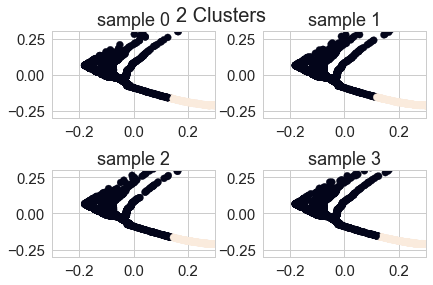

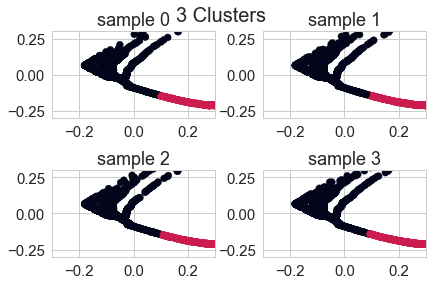

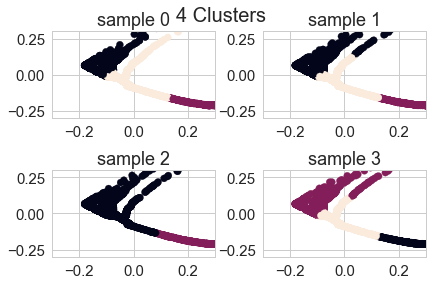

In [7]:

# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [8]:
#N-clusters = 2
cluster_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(2):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print(frame.describe())

0
               25k          age     division          10k       gender  \
count  8372.000000  8372.000000  8372.000000  8372.000000  8372.000000   
mean    108.987292    38.744267   875.934544    43.359973     0.776278   
std       9.196701     9.372407   761.177683     3.795191     0.416763   
min      48.320000    18.000000     1.000000    18.030000     0.000000   
25%     104.027500    31.000000   263.000000    41.380000     1.000000   
50%     109.560000    39.000000   687.000000    43.550000     1.000000   
75%     115.800000    46.000000  1205.000000    46.020000     1.000000   
max     128.530000    73.000000  3077.000000    54.930000     1.000000   

              half     official      overall         pace          30k  \
count  8372.000000  8372.000000  8372.000000  8372.000000  8372.000000   
mean     91.718100   189.936211  4258.169971     7.252217   131.905368   
std       7.790583    15.749052  2496.297836     0.600790    11.025560   
min      40.270000    85.530000    

In [9]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.7362280975300026
0.7400339017107224
0.7417472750200313
0.737468225777423


In [10]:
cluster_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(2):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print(frame.describe())

0
               25k          age     division          10k       gender  \
count  5493.000000  5493.000000  5493.000000  5493.000000  5493.000000   
mean    120.126461    41.894411  1125.778809    47.639370     0.511742   
std       5.123305    10.026647   814.023473     2.384096     0.499908   
min      94.300000    18.000000     1.000000    36.780000     0.000000   
25%     116.950000    35.000000   461.000000    46.170000     0.000000   
50%     120.500000    43.000000  1012.000000    47.880000     1.000000   
75%     123.830000    50.000000  1486.000000    49.280000     1.000000   
max     135.050000    72.000000  3304.000000    56.380000     1.000000   

              half     official       overall         pace          30k  \
count  5493.000000  5493.000000   5493.000000  5493.000000  5493.000000   
mean    100.956738   210.558507   8631.976516     8.038915   145.689372   
std       4.547817     6.194792   1691.280815     0.236515     5.621314   
min      79.250000   199.150000

In [11]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.7537762131429461
0.7531156012752681
0.7532363324145325
0.7486108637900436


### Observations
In the data set featuring 2 n clusters, Cluster 1 contained about 78 percent male, an avergae age of 38 and a pace of 7.25 minute miles.Cluster 2 contained about 60 percent women, an avergae age of 44 and a pace of 8.7 minute miles.
Cluster 1 seemed to have included younger male runners with enhanced running abilities.

# Challenge: Make your Network

In [12]:
Titanic = pd.read_csv('/Users/ezzan/Downloads/python_drills/titanic.csv')
Titanic.dtypes
Titanic["alone"]=Titanic["alone"].fillna(0).astype(bool)
#Titanic["adult_male"]=Titanic["adult_male"].fillna(0).astype(bool)

Titanic["sex"] = Titanic["sex"].map({"male": 1, "female":0}).fillna(0).astype(np.int64)
Titanic['age'] = Titanic['age'].fillna(Titanic['age'].median()).astype(np.int64)
Titanic['adult_male'] = Titanic['adult_male'].map({'True': 1, 'False':0}).fillna(0).astype(np.int64)
Titanic = Titanic.drop(["embark_town", "deck", "alive"], axis=1)
#Titanic.birth_year.astype(int)
Titanic['embarked'] = Titanic['embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).fillna(0).astype(np.int64)
#Titanic['alive'] = Titanic['alive'].map( {'no': 0, 'yes': 1} ).fillna(0).astype(np.int64)
Titanic['alone'] = Titanic["alone"].map({'True': 1, 'False':0}).fillna(0).astype(np.int64)
Titanic['class'] = Titanic["class"].map({"First": 1, "Second":2, "Third":3}).fillna(0).astype(np.int64)
Titanic['who'] = Titanic["who"].map({"man": 1, "woman":2, "child":3}).fillna(0).astype(np.int64)
Titanic["fare"] = Titanic["fare"].astype(np.int64)
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22,1,0,7,0,3,1,0,0
1,1,1,0,38,1,0,71,1,1,2,0,0
2,1,3,0,26,0,0,7,0,3,2,0,0
3,1,1,0,35,1,0,53,0,1,2,0,0
4,0,3,1,35,0,0,8,0,3,1,0,0
5,0,3,1,28,0,0,8,2,3,1,0,0
6,0,1,1,54,0,0,51,0,1,1,0,0
7,0,3,1,2,3,1,21,0,3,3,0,0
8,1,3,0,27,0,2,11,0,3,2,0,0
9,1,2,0,14,1,0,30,1,2,3,0,0


In [13]:
Titanic.dtypes

survived      int64
pclass        int64
sex           int64
age           int64
sibsp         int64
parch         int64
fare          int64
embarked      int64
class         int64
who           int64
adult_male    int64
alone         int64
dtype: object

In [14]:
#get dummies didnt work
pd.get_dummies(Titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22,1,0,7,0,3,1,0,0
1,1,1,0,38,1,0,71,1,1,2,0,0
2,1,3,0,26,0,0,7,0,3,2,0,0
3,1,1,0,35,1,0,53,0,1,2,0,0
4,0,3,1,35,0,0,8,0,3,1,0,0
5,0,3,1,28,0,0,8,2,3,1,0,0
6,0,1,1,54,0,0,51,0,1,1,0,0
7,0,3,1,2,3,1,21,0,3,3,0,0
8,1,3,0,27,0,2,11,0,3,2,0,0
9,1,2,0,14,1,0,30,1,2,3,0,0


## Random Forest Learning

In [15]:

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = Titanic.drop('survived', 1)
Y = Titanic['survived']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10).mean()


0.8137160935194643

## PCA

In [16]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance
scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=10)
PCAx = pca.fit_transform(scaled_X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[2.89543063e-01 2.65029373e-01 1.30634711e-01 1.00248112e-01
 8.26381056e-02 6.26403199e-02 5.07416788e-02 1.85246372e-02
 4.33451238e-33 0.00000000e+00]
[4.81855354e+01 4.61006566e+01 3.23660277e+01 2.83529471e+01
 2.57424740e+01 2.24123342e+01 2.01717010e+01 1.21880706e+01
 5.89563014e-15 0.00000000e+00]


In [17]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, PCAx, Y, cv=10).mean()

0.7912807853819089

## MLP Classifier

In [18]:
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X,Y)
mlp.fit(PCAx, Y)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
mlp.score(X, Y)

ValueError: shapes (891,11) and (10,100) not aligned: 11 (dim 1) != 10 (dim 0)

In [ ]:
mlp.score(PCAx, Y)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,))
print(cross_val_score(mlp,PCAx, Y, cv=5))
print(cross_val_score(mlp,PCAx, Y, cv=5).mean())

In [ ]:
predict = ['Random Forest', 'PCA', 'MLP']
predict = pd.DataFrame(index=predict)
predict["mean"] = [0.809334354783793,.7901952105322892,.829500667]
plt.plot(predict['mean'])
plt.show()

# Challenge: Create your own NLP network/ Capstone

In [20]:
from collections import Counter
import os, sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import WordPunctTokenizer

In [21]:
#tweets = pd.read_csv('C://Users/ezzan/Downloads/potus.csv')
tweets = pd.read_csv('C://Users/ezzan/Downloads/tweets.csv')
tweets3= pd.read_csv('C://Users/ezzan/Downloads/obama_tweets.csv')

In [22]:
tweets3.head()
tweets.rename(columns={'Date':'time'}, inplace=True)
tweets.rename(columns={'Tweet ID':'id'}, inplace=True)
tweets = tweets[['handle','text']]
tweets.dtypes

handle    object
text      object
dtype: object

In [23]:

tweets3.rename(columns={'Text':'text'}, inplace=True)
tweets3.rename(columns={'Date':'time'}, inplace=True)
tweets3.rename(columns={'Tweet ID':'id'}, inplace=True)
tweets3.rename(columns={'Favorites':'favorite_counts'}, inplace=True)
#tweets['retweet'] = np.where(tweets['is_retweet']==True,1,0)
tweets3["handle"] = "BarackObama"
tweets3 = tweets3[['handle','text']]

In [24]:
frames = [tweets, tweets3]
tweets = pd.concat(frames)
tweets.head(5)

,handle,text
0,HillaryClinton,The question in this election: Who can put the...
1,HillaryClinton,"Last night, Donald Trump said not paying taxes..."
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...
3,HillaryClinton,"If we stand together, there's nothing we can't..."
4,HillaryClinton,Both candidates were asked about how they'd co...


In [25]:
from wordcloud import WordCloud

In [26]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://http[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))


In [27]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()
stop_words = nltk.corpus.stopwords.words('english')

In [41]:
wpt = nltk.WordPunctTokenizer()

def tweet_edit(tweet):
    tweet = tweet.replace('-', ' ')
    tweet = re.sub(r'[:]', ' ', tweet)
    tweet = re.sub(r'https://', ' ', tweet)
    tweet= re.sub(r'https',' ', tweet)
    tweet= re.sub(r'http',' ', tweet)
    tweet = re.sub(r'[.]', ' ', tweet)
    tweet = re.sub(r'twitter', ' ', tweet)
    tweet = re.sub(r'([^\s\w]|_)+', '', tweet, re.I|re.A)
    tweet = tweet.lower()
    tweet = tweet.strip()
    #tokens_filtered_alpha = filter(lambda x: x.isalpha(), tokens)
    #filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    #tweet = ' '.join(filtered_tokens)
    return tweet

normalize_corpus = np.vectorize(tweet_edit)

In [42]:
tweets['text'] = normalize_corpus(tweets.text)
tweets.head(5)

,handle,text
0,HillaryClinton,the question in this election who can put the...
1,HillaryClinton,last night donald trump said not paying taxes ...
2,HillaryClinton,couldnt be more proud of hillaryclinton her v...
3,HillaryClinton,if we stand together theres nothing we cant do...
4,HillaryClinton,both candidates were asked about how theyd con...


In [43]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,handle,text
0,HillaryClinton,question this election plans into action that ...
1,HillaryClinton,last night donald trump said paying taxes smar...
2,HillaryClinton,couldnt more proud hillaryclinton vision comma...
3,HillaryClinton,stand together theres nothing cant make sure y...
4,HillaryClinton,both candidates were asked about theyd confron...


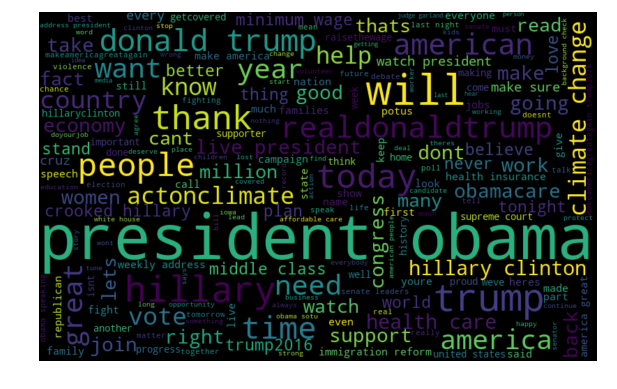

In [44]:
all_words = ' '.join([text for text in tweets['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Count Vect

In [45]:
count_vect = CountVectorizer()

In [46]:
X = tweets.drop(["handle"], axis=1)
y = tweets["handle"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
train_data_bow = count_vect.fit_transform(X_train['text'])
test_data_bow = count_vect.transform(X_test['text'])

In [49]:
rfc = ensemble.RandomForestClassifier()
crs = cross_val_score(rfc, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.83114257 0.84529828 0.83215369 0.8372093  0.83097166 0.86437247
 0.86336032 0.83603239 0.83502024 0.83991895]
Mean of Folds are =  0.8415479873587082


In [50]:
svc = SVC()
crs =cross_val_score(svc, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.51162791 0.51162791 0.51162791 0.51162791 0.51214575 0.51214575
 0.51214575 0.51214575 0.51214575 0.51165147]
Mean of Folds are =  0.5118891841944526


In [51]:
svcl = SVC(kernel='linear')
crs =cross_val_score(svcl, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())


Cross-Valid Fold Results are:  [0.90293225 0.88473205 0.88574317 0.87462083 0.89979757 0.90890688
 0.91396761 0.8937247  0.8917004  0.90070922]
Mean of Folds are =  0.8956834697275742


In [52]:
gbc = ensemble.GradientBoostingClassifier()
crs =cross_val_score(gbc, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

KeyboardInterrupt: 

In [ ]:
lr = LogisticRegression()
crs = cross_val_score(lr, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

## Bigrams

In [ ]:
count_vect_bigram = CountVectorizer(ngram_range=(1,2))
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train['text'])
test_data_bow_bigram = count_vect_bigram.transform(X_test['text'])

In [ ]:

crs = cross_val_score(lr, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

In [ ]:
gbc = ensemble.GradientBoostingClassifier()
crs =cross_val_score(gbc, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
crs
print("Mean of Folds are = ",crs.mean())

In [ ]:
svcl = SVC(kernel='linear')
crs =cross_val_score(svcl, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

In [ ]:
rfc = ensemble.RandomForestClassifier()
crs21 = cross_val_score(rfc, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs21)
print("Mean of Folds are = ",crs21.mean())

In [ ]:
lr2= cross_val_score(lr, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid trigram Fold Results are: ",lr2)
print("Mean of Folds are = ",lr2.mean())

## Trigrams

In [ ]:
count_vect_trigram = CountVectorizer(ngram_range=(1,3))
train_data_bow_trigram = count_vect_trigram.fit_transform(X_train['text'])
test_data_bow_trigram = count_vect_trigram.transform(X_test['text'])

In [ ]:
rfc = ensemble.RandomForestClassifier()
crs31 = cross_val_score(rfc, train_data_bow_trigram, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs31)
print("Mean of Folds are = ",crs31.mean())

In [ ]:
svcl = SVC(kernel='linear')
crs32 =cross_val_score(svcl, train_data_bow_trigram, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs32)
print("Mean of Folds are = ",cr32s.mean())

In [ ]:
gbc = ensemble.GradientBoostingClassifier()
crs33 =cross_val_score(gbc, train_data_bow_trigram, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs33)
print("Mean of Folds are = ",crs33.mean())

In [ ]:
lr3= cross_val_score(lr, train_data_bow_trigram, y_train, cv=10)
print("Cross-Valid trigram Fold Results are: ",lr3)
print("Mean of Folds are = ",lr3.mean())

# TFIDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

vectorizer_tfidf = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=False, sublinear_tf=True,
                                max_df=0.5,                                
                                min_df=2, 
                                stop_words='english', 
                                lowercase=True, # lowercase everything
                               )

test_data = vectorizer_tfidf.fit_transform(X_test['text'])
train_data = vectorizer_tfidf.fit_transform(X_train['text'])

In [54]:
rfc = ensemble.RandomForestClassifier()
crs = cross_val_score(rfc, train_data, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.86653185 0.86450961 0.85844287 0.85743175 0.85323887 0.87753036
 0.85222672 0.86437247 0.84615385 0.8591692 ]
Mean of Folds are =  0.8599607543646506


In [ ]:
1

In [55]:
svc = SVC()
crs =cross_val_score(svc, train_data, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.51162791 0.51162791 0.51162791 0.51162791 0.51214575 0.51214575
 0.51214575 0.51214575 0.51214575 0.51165147]
Mean of Folds are =  0.5118891841944526


In [57]:
gbc = ensemble.GradientBoostingClassifier()
crs =cross_val_score(gbc, train_data, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.81193124 0.82507583 0.8008089  0.80586451 0.8097166  0.83502024
 0.83198381 0.80364372 0.81477733 0.80547112]
Mean of Folds are =  0.8144293310363644


In [ ]:
lr = LogisticRegression()
crs =cross_val_score(lr, train_data, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

In [60]:
# Calculate weights on training data
weights = np.asarray(train_data.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'avg_weight': weights})
print("Train:\n", weights_df.sort_values(by='avg_weight', ascending=False).head(50))


Train:
                        word  avg_weight
3534              president    0.034723
3169                  obama    0.030266
4709                  trump    0.016760
2194                hillary    0.015108
4551                  thank    0.014611
2814                   make    0.013073
236                 america    0.013042
4614                   time    0.012197
3382                 people    0.011892
2055                  great    0.011660
4628                  today    0.010674
242               americans    0.010583
2524                   just    0.010340
2145                 health    0.009985
4959                  watch    0.009889
4710              trump2016    0.009746
1447                 donald    0.009565
1016               congress    0.009180
3732        realdonaldtrump    0.008933
713                    care    0.008667
779                  change    0.008248
1118                country    0.007882
2815  makeamericagreatagain    0.007607
1457                   dont    0

In [61]:

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Reduce feature space to ~10% of original
svd = TruncatedSVD(600)

# Make pipeline to run svd and normalize results
lsa_pipe = make_pipeline(svd, Normalizer())

# Fit with training data, transform test data
X_train_lsa = lsa_pipe.fit_transform(train_data)
#X_test_lsa = lsa_pipe.transform(test_data_tfidf1)

# Examine variance captured in reduced feature space
variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('Percent variance captured by components:', total_variance*100)

sent_by_component = pd.DataFrame(X_train_lsa, index=X_train)

# Look at values from first 5 components
for i in range(6):
    print('Component {}:'.format(i))
    print(sent_by_component.loc[:, i].sort_values(ascending=False)[:5])

Percent variance captured by components: 56.37661418328135
Component 0:
(ears were inspirations shrek president obama dwanimation,)                                                       0.750499
(would here many others would here without naacp president obama,)                                                0.743004
(semper president obama marines camp pendleton,)                                                                  0.661872
(this every thank president obama veteransdaypic comnrcbsldrdh,)                                                  0.561358
(cfpb already addressed more than 175000 complaints from across nationgiving people advocate president obama,)    0.555652
Name: 0, dtype: float64
Component 1:
(thank america trump2016 makeamericagreatagain co09htbbgphf coujnmdnvkuv,)                    0.821109
(thank america makeamericagreatagain trump2016 cotrrdr0nlpm,)                                 0.821109
(thank northern mariana islandssupertuesday trump2016 makeamericagreat

# K Cluster

In [ ]:
X = tweets.text
y = tweets.handle

In [ ]:
X =tweets['text']
y = tweets['handle']

X_tfidf = vectorizer.fit_transform(X)
#print(X_tfidf)
from sklearn.preprocessing import normalize
normX_tfidf = normalize(X_tfidf)

kmeans = MiniBatchKMeans(n_clusters=4, init='k-means++', batch_size=500)
kmeans.fit(normX_tfidf)

# get some metrics on our data

print("Homogeneity Score is: {:.3f}".format(metrics.homogeneity_score(y, kmeans.labels_)))
print("Completeness Score: {:.3f}".format(metrics.completeness_score(y, kmeans.labels_)))
print("V-measure Score: {:.3f}".format(metrics.v_measure_score(y, kmeans.labels_)))
print("Adjusted Rand-Index Score: {:.3f}".format(metrics.adjusted_rand_score(y, kmeans.labels_)))
print("Silhouette Coefficient Score: {:.3f}".format(metrics.silhouette_score(normX_tfidf, kmeans.labels_, sample_size=5000)))

In [ ]:
from sklearn.utils import shuffle
X = tweets
X['kmcluster'] = kmeans.labels_

In [ ]:
print(shuffle(X[X.kmcluster == 1][['text','handle']]).head(100))

In [ ]:
print(shuffle(X[X.kmcluster == 2][['text','handle']]).head(100))

In [ ]:
print(shuffle(X[X.kmcluster == 3][['text','handle']]).head(100))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['text'], 
                                                    X['handle'], test_size = 0.25, random_state = 42)

normX_train_tfidf = normalize(tfidf_vector1.fit_transform(X_train))
normX_test_tfidf = normalize(tfidf_vector1.transform(X_test))


km = MiniBatchKMeans(n_clusters=4, init='k-means++', batch_size=5000)

km.fit(normX_train_tfidf)
km_train_label = km.labels_
km_test_label = km.predict(normX_test_tfidf)


In [ ]:
from scipy.sparse import coo_matrix, hstack

X_train_km = hstack([train_data_bow_bigram,pd.DataFrame(km_train_label)])
X_test_km = hstack([test_data_bow_bigram,pd.DataFrame(km_test_label)])

lr = LogisticRegression()
lr.fit(X_train_km,y_train)

print('Training set score:', lr.score(X_train_km, y_train))
print('\nTest set score:', lr.score(X_test_km, y_test))

In [ ]:

rfc.fit(X_train_km,y_train)

print('Training set score:', rfc.score(X_train_km, y_train))
print('\nTest set score:', rfc.score(X_test_km, y_test))

In [ ]:

svc.fit(X_train_km,y_train)

print('Training set score:', svc.score(X_train_km, y_train))
print('\nTest set score:', svc.score(X_test_km, y_test))

In [ ]:
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [ ]:
X_pca = PCA(3).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
svd= TruncatedSVD(250)

lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(train_data)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(10):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

In [ ]:
X_test_lsa = lsa.transform(test_data)

X_train_combo = hstack([X_train_km, X_train_lsa])
X_test_combo = hstack([X_test_km, X_test_lsa])

lr = LogisticRegression()
crs = cross_val_score(lr, X_train_combo, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

In [ ]:
feat_importance = rfc.fit(X_train, y_train).feature_importances_
features = vectorizer.get_feature_names()

importance_df = pd.DataFrame({'word': vectorizer.get_feature_names(), 'importance': feat_importance})
importance_df.sort_values(by='importance', ascending=False).head(10)